<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations

2025-06-24 11:50:54.001922: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 11:50:54.021316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 11:50:54.080470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750758654.181444   55654 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750758654.214569   55654 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750758654.311491   55654 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Regression with sequential model</h1>

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2845 - val_loss: 4.3857
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 4.2382 - val_loss: 4.3414
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 4.1955 - val_loss: 4.3003
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 4.1557 - val_loss: 4.2619
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 4.1185 - val_loss: 4.2259
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 4.0836 - val_loss: 4.1918
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 4.0506 - val_loss: 4.1596
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 4.0192 - val_loss: 4.1289
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 3.9893 - val_loss: 4.0996
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 3.9607 - val_loss: 4.0714
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 3.9331 - val_loss: 4.0443
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 3.9066

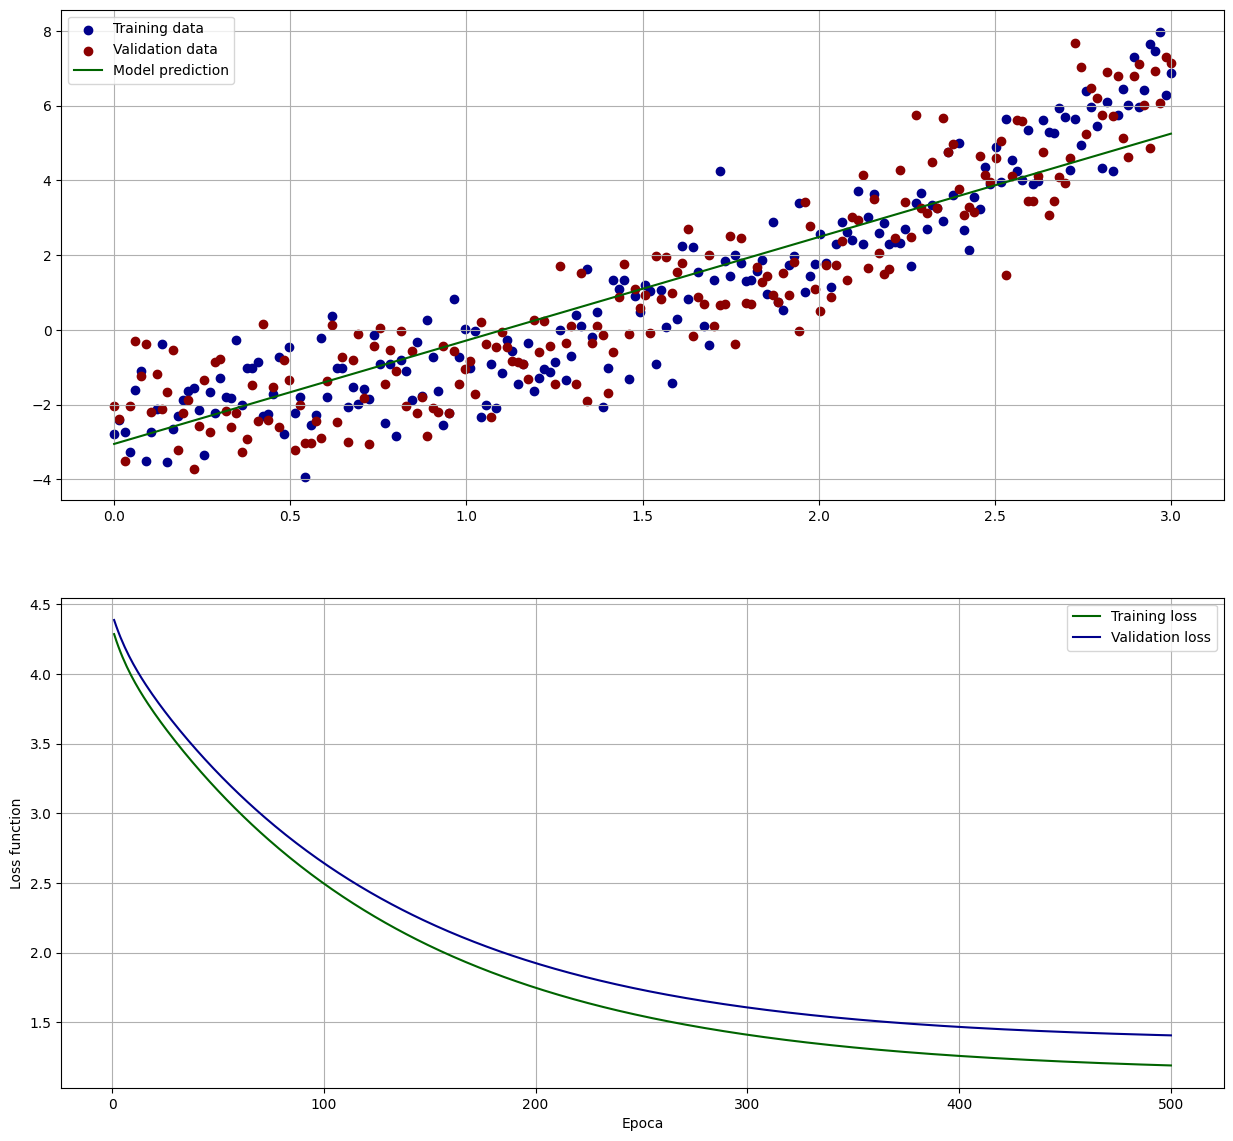

In [28]:
# Importo i dati (che sono già divisi in training e validation set)
data = np.loadtxt("Dati/Esercitazione4/data.dat")
xtr = data[:, 0].reshape(-1, 1)
ytr = data[:, 1].reshape(-1, 1)
xval = data[:, 2].reshape(-1, 1)
yval = data[:, 3].reshape(-1, 1)


# Sono interessato a studiare le capacità predittive di un singolo neurone e per questo motivo
# considero un modello caratterizzato da un solo layer Dense dotato di un singolo nodo. Il passo 
# successivo consiste nel compilare il modello e addestrare la rete.
model = keras.Sequential()
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
# Specifico parametri allenamento. Ogni ciclo viene allenato con l'intero dataset di training e sono forniti anche 
# i dati x e y per la validation e quindi lo studio delle caratteristiche predittive del modello
model.fit(tf.Variable(xtr), tf.Variable(ytr), batch_size=len(xtr), epochs = 500, validation_data=(xval, yval))


# Stampo training dataset, validation dataset e predizione del modello. Quello che osserviamo
# è una descrizione non accurata dell'andamento, poichè il singolo nodo ha una capacità rappresentativa 
# lineare, mentre l'andamento da catturare sembra essere quadratico o comunque polinomiale con grado 
# diverso da uno. Riporto in un secondo grafico training e validation loss.
fig, ax = plt.subplots(2, 1, figsize = (15, 14))

ax[0].scatter(xtr, ytr, color = 'darkblue', label = "Training data")
ax[0].scatter(xval, yval, color = 'darkred', label = "Validation data")
ax[0].plot(xval, model.predict(xval), color = 'darkgreen', label = "Model prediction")

ax[1].plot(np.linspace(1, 500, 500), model.history.history['loss'], color = 'darkgreen', label = 'Training loss')
ax[1].plot(np.linspace(1, 500, 500), model.history.history['val_loss'], color = 'darkblue', label = 'Validation loss')
ax[1].set_ylabel("Loss function")
ax[1].set_xlabel("Epoca")

ax[0].legend(loc = "best")
ax[1].legend(loc = "best")
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 8.7058 - val_loss: 8.5533
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 8.5795 - val_loss: 8.4308
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 8.4541 - val_loss: 8.3057
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3263 - val_loss: 8.1736
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 8.1914 - val_loss: 8.0381
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - loss: 8.0527 - val_loss: 7.9070
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 7.9183 - val_loss: 7.7717
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 7.7797 - val_loss: 7.6314
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 7.6357 - val_loss: 7.4854
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 7.4857 - val_loss: 7.3332
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 7.3292 - val_loss: 7.1744
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - loss: 7.1658 - 

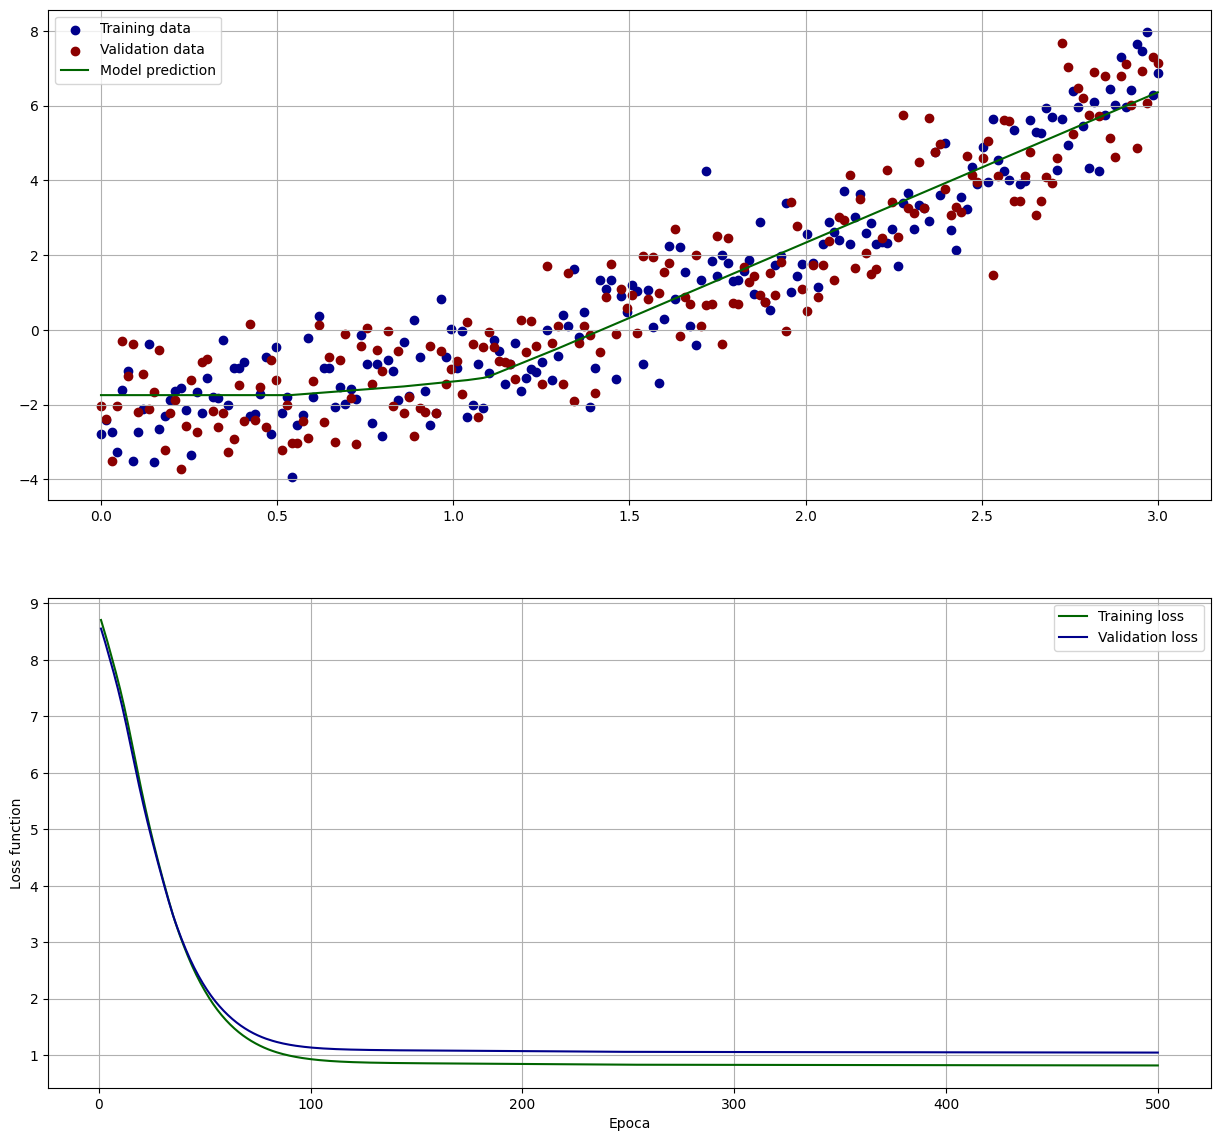

In [31]:
# Svolgo lo stesso esercizio di fitting precedente, ma con un modello più articolato, dotato di 3 layers da 10 nodi ciascuno 
# dotati di funzione d'attivazione relu e con un ultimo strato lineare. In questo caso, data la complessità del modello, dovremmo 
# dopo un certo numero di epoche andare in overfitting
data = np.loadtxt("Dati/Esercitazione4/data.dat")
xtr = data[:, 0].reshape(-1, 1)
ytr = data[:, 1].reshape(-1, 1)
xval = data[:, 2].reshape(-1, 1)
yval = data[:, 3].reshape(-1, 1)

# Costruzione del modello
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(1))

# Compilazione ed allenamento
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(tf.Variable(xtr), tf.Variable(ytr), batch_size=len(xtr), epochs = 500, validation_data=(xval, yval))


# Stampo training dataset, validation dataset e predizione del modello in un plot e loss function per training
# e validation dataset in un secondo plot.
fig, ax = plt.subplots(2, 1, figsize = (15, 14))

ax[0].scatter(xtr, ytr, color = 'darkblue', label = "Training data")
ax[0].scatter(xval, yval, color = 'darkred', label = "Validation data")
ax[0].plot(xval, model.predict(xval), color = 'darkgreen', label = "Model prediction")

ax[1].plot(np.linspace(1, 500, 500), model.history.history['loss'], color = 'darkgreen', label = 'Training loss')
ax[1].plot(np.linspace(1, 500, 500), model.history.history['val_loss'], color = 'darkblue', label = 'Validation loss')
ax[1].set_ylabel("Loss function")
ax[1].set_xlabel("Epoca")

ax[0].legend(loc = "best")
ax[1].legend(loc = "best")
ax[0].grid(True)
ax[1].grid(True)
plt.show()